In [1]:
cd ../../src

/Users/in-divye.singh/Documents/Projects/MIC_predictor/src


In [2]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

In [3]:
from utils import *

In [4]:
from geneal.genetic_algorithms import ContinuousGenAlgSolver

In [7]:
avp_ic50 = pd.read_csv("../data/raw/AVP-IC50Pred_train.csv")
ha_avp = pd.read_csv("../data/raw/HA_AVP.csv")

In [8]:
df = pd.concat([avp_ic50[['Sequence','MIC']], ha_avp], axis=0).drop_duplicates(['Sequence']).reset_index(drop=True)
df = sequence_filtering(df)

In [9]:
contact_energy_matrix = pd.read_csv("../data/raw/contact_energy.csv", index_col=0)
code3_to_code1 = pd.read_excel("../data/raw/amino_acid_codes.xlsx")
code3_to_code1_dict = dict(code3_to_code1[['Three-letter symbol', 'One-letter symbol']].values)
contact_energy_matrix.columns = [code3_to_code1_dict[code] for code in contact_energy_matrix.columns]
contact_energy_matrix.index = [code3_to_code1_dict[code] for code in contact_energy_matrix.index]

In [10]:
def seq_to_contact_energy(seq):
        return [contact_energy_matrix[r][c] for r,c in list(zip(seq[:-1],seq[1:]))]
df['contact_energy'] = df['Sequence'].apply(seq_to_contact_energy)
df['net_contact_energy'] = df['contact_energy'].apply(lambda s: np.sum(s))

In [11]:
df

,Sequence,MIC,contact_energy,net_contact_energy
0,AAQRRGRVGRNPNQVGD,442.00000,"[-2.72, -1.89, -1.8, -1.55, -1.72, -1.72, -3.0...",-34.02
1,HRILARIRQMMT,435.50000,"[-2.16, -3.63, -7.04, -4.91, -1.83, -3.63, -3....",-40.90
2,RNPSQVGD,383.00000,"[-1.64, -1.53, -1.57, -1.49, -3.07, -3.38, -1.59]",-14.27
3,RVGRNPNQVGD,374.00000,"[-3.07, -3.38, -1.72, -1.64, -1.53, -1.53, -1....",-22.62
4,AAQRRGRIGRNPSQVGD,358.00000,"[-2.72, -1.89, -1.8, -1.55, -1.72, -1.72, -3.6...",-34.80
...,...,...,...,...
707,NGAICWGPCPTAFRQIGNCGHFKVRCCKIR,0.11515,"[-1.74, -2.31, -4.58, -5.5, -4.95, -3.42, -1.8...",-92.70
708,CFPYITRPGTYHDWWYTRKNRQ,0.30000,"[-5.8, -4.25, -3.19, -5.25, -4.03, -1.9, -1.7,...",-61.63
709,YTSLIHSLIEESQNQQEKNEQELLELDKWASLWNWF,0.01131,"[-3.01, -1.96, -3.92, -7.04, -4.14, -2.11, -3....",-108.13
710,GTNLSVPNPLGFFPDHQLDPAFGANSNNPDWDFNPNKDHWPEANKVG,0.00008,"[-2.08, -1.88, -3.74, -3.92, -3.05, -3.32, -1....",-122.85


In [87]:
def fitness_function(mat_chromosome):
    weight_mat = pd.DataFrame(np.reshape(mat_chromosome, (20,20)),
                              columns=contact_energy_matrix.columns, index=contact_energy_matrix.index)
    seq_weights_lists = [[weight_mat[r][c] for r,c in list(zip(seq[:-1],seq[1:]))] for seq in df['Sequence']]
    wght_net_contact_energy = [np.dot(w, v_ce) for w, v_ce in zip(df['contact_energy'], seq_weights_lists)]
    return abs(pearsonr(wght_net_contact_energy, df['MIC'])[0])

In [90]:
solver = ContinuousGenAlgSolver(
    n_genes=400, 
    fitness_function=fitness_function,
    pop_size=10,
    max_gen=500,
    mutation_rate=0.1,
    selection_rate=0.6,
    selection_strategy="roulette_wheel"
)

Iteration: 50
Best fitness: 0.44098946288247964
Iteration: 100
Best fitness: 0.45819785851734945
Iteration: 150
Best fitness: 0.4675227264188351
Iteration: 200
Best fitness: 0.47115192209811807
Iteration: 250
Best fitness: 0.47115192209811807
Iteration: 300
Best fitness: 0.47115192209811807
Iteration: 350
Best fitness: 0.4762864090332917
Iteration: 400
Best fitness: 0.47944153319289795
Iteration: 450
Best fitness: 0.4795721077302562
Iteration: 500
Best fitness: 0.48658851523452085


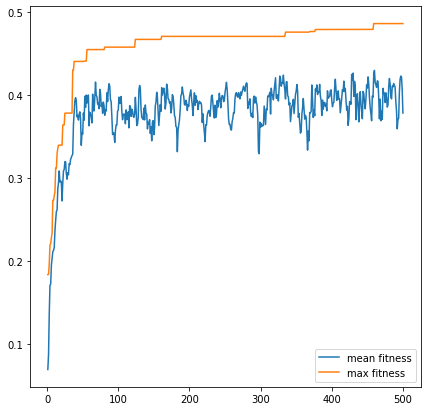


#############################
#			STATS			#
#############################


Total running time: 13 minutes, 55 seconds


Population size: 10
Number variables: 400
Selection rate: 0.6
Mutation rate: 0.1
Number Generations: 500

Best fitness: 0.48658851523452085
Best individual: [-2.7697747  -8.33217154 -1.10890054  0.19373401 -5.27610073 -8.08488259
 -8.7389151  -0.93963334 -6.20271268  3.50593503 -2.89356763 -4.12608684
 -6.62853429  2.99795963 -5.8840924   0.47361258  8.1847394  -3.31431405
  9.15816315 -5.11827427  7.22701214  7.59936848 -1.9781025   3.4788489
 -6.19010871  7.57251374 -5.5844521  -6.64116301  1.50219061  1.48767402
  0.17735687  9.17099393  4.31599414 -3.22170867  9.35158796  9.70061919
  0.86468379 -5.48165418 -2.54680445  9.49800628 -2.26822193 -4.07476917
  9.17845293 -7.4645102  -0.87050849  7.68757375  7.29956053 -0.82457978
  0.47569168  1.84268595 -6.85862713 -8.94227373  4.66984619 -4.95147495
 -9.72892566 -9.86502139 -2.78446494 -9.12879817 -6.67844594 -9.2

In [91]:
solver.solve()

In [92]:
fitness_function(solver.best_individual_)

0.48658851523452085

In [93]:
pearsonr(df['MIC'], df['net_contact_energy'])

(0.3194997006157818, 2.321838283616058e-18)

In [ ]:
import seaborn as sns

In [ ]:
sns.relplot(y=df['net_contact_energy'], x=df['MIC'])

In [ ]:
weight_mat = pd.DataFrame(np.reshape(solver.best_individual_, (20,20)),
                          columns=contact_energy_matrix.columns, index=contact_energy_matrix.index)
seq_weights_lists = [[weight_mat[r][c] for r,c in list(zip(seq[:-1],seq[1:]))] for seq in df['Sequence']]
wght_net_contact_energy = [np.dot(w, v_ce) for w, v_ce in zip(df['contact_energy'], seq_weights_lists)]

In [ ]:
sns.relplot(y=wght_net_contact_energy, x=df['MIC'])